# Data Analysis

#### This notebook will be used for the analysis part of the project. Here we will explore and visualise the data to get a firm grasp on what the data looks like.


In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Read data to frame

df_organisations_raw = pd.read_csv("../data/hd2019.csv", encoding='latin1')
df_customer_data_raw = pd.read_csv("../data/organisation_sales_data.csv")


In [27]:
# Define data shape 

raw_org_columns = df_organisations_raw.shape[1]
raw_org_rows = df_organisations_raw.shape[0]

# Manual identification of columns that will have values 
columns_of_value = ['UNITID', 'INSTNM', 'IALIAS', 'CITY', 'STABBR', 'FIPS', 'OBEREG','GENTELE', 'EIN', 'DUNS', 'OPEID', 
                    'OPEFLAG', 'SECTOR', 'ICLEVEL', 'CONTROL', 'HLOFFER', 'UGOFFER','GROFFER', 'HDEGOFR1', 'DEGGRANT', 
                    'HBCU', 'HOSPITAL', 'MEDICAL', 'TRIBAL', 'LOCALE', 'OPENPUBL', 'ACT', 'NEWID', 'DEATHYR', 'CYACTIVE', 
                    'POSTSEC', 'PSEFLAG', 'PSET4FLG', 'RPTMTH', 'INSTCAT', 'C18BASIC', 'C18IPUG', 'C18IPGRD', 'C18UGPRF', 
                    'C18ENPRF', 'C18SZSET', 'C15BASIC', 'CCBASIC', 'CARNEGIE', 'LANDGRNT', 'INSTSIZE', 'F1SYSTYP', 
                    'F1SYSNAM', 'F1SYSCOD', 'CBSA','CBSATYPE', 'CSA', 'NECTA', 'COUNTYCD', 'COUNTYNM', 'CNGDSTCD']

df_organisations = df_organisations_raw[columns_of_value]


In [28]:
# Filter the dataset to remove records that arent relevant
# Remove institutions that have closed down  or removed from IPEDS using column CLOSEDAT & DEATHYR

df_organisations_filtered = df_organisations.loc[(df_organisations['DEATHYR']==-2)]

In [29]:
# Understading the data

raw_columns = df_organisations_raw.shape[1]
raw_rows = df_organisations_raw.shape[0]
org_columns = df_organisations.shape[1]
org_rows = df_organisations_raw.shape[0]
fil_org_columns = df_organisations_filtered.shape[1]
fil_org_rows = df_organisations_filtered.shape[0]
is_nulls_counts = len(df_organisations_filtered.columns[df_organisations_filtered.isnull().sum()==0])
categorical_vals = df_organisations_filtered.select_dtypes(include=['object'])
categorical_vals_columns = list(categorical_vals.columns)

print(f'The raw data has {raw_columns} columns and {raw_rows} rows')
print(f'The unfiltered reduced data has {org_columns} columns and {org_rows} rows')
print(f'The filtered organisations df has {fil_org_columns} columns and {fil_org_rows} rows')
print(f'The df has {df_organisations_filtered.shape[1]} columns without {is_nulls_counts} containing nulls')
print(f'There are {categorical_vals.shape[1]} columns with categorical values, they are in the columns: '
      f'\n\n{categorical_vals_columns}')


The raw data has 73 columns and 6559 rows
The unfiltered reduced data has 56 columns and 6559 rows
The filtered organisations df has 56 columns and 6388 rows
The df has 56 columns without 55 containing nulls
There are 9 columns with categorical values, they are in the columns: 

['INSTNM', 'IALIAS', 'CITY', 'STABBR', 'GENTELE', 'DUNS', 'ACT', 'F1SYSNAM', 'COUNTYNM']


## The distribution of organisations across states
The Top 5 States with organisations: 
CA, NY, FL, PA, TX

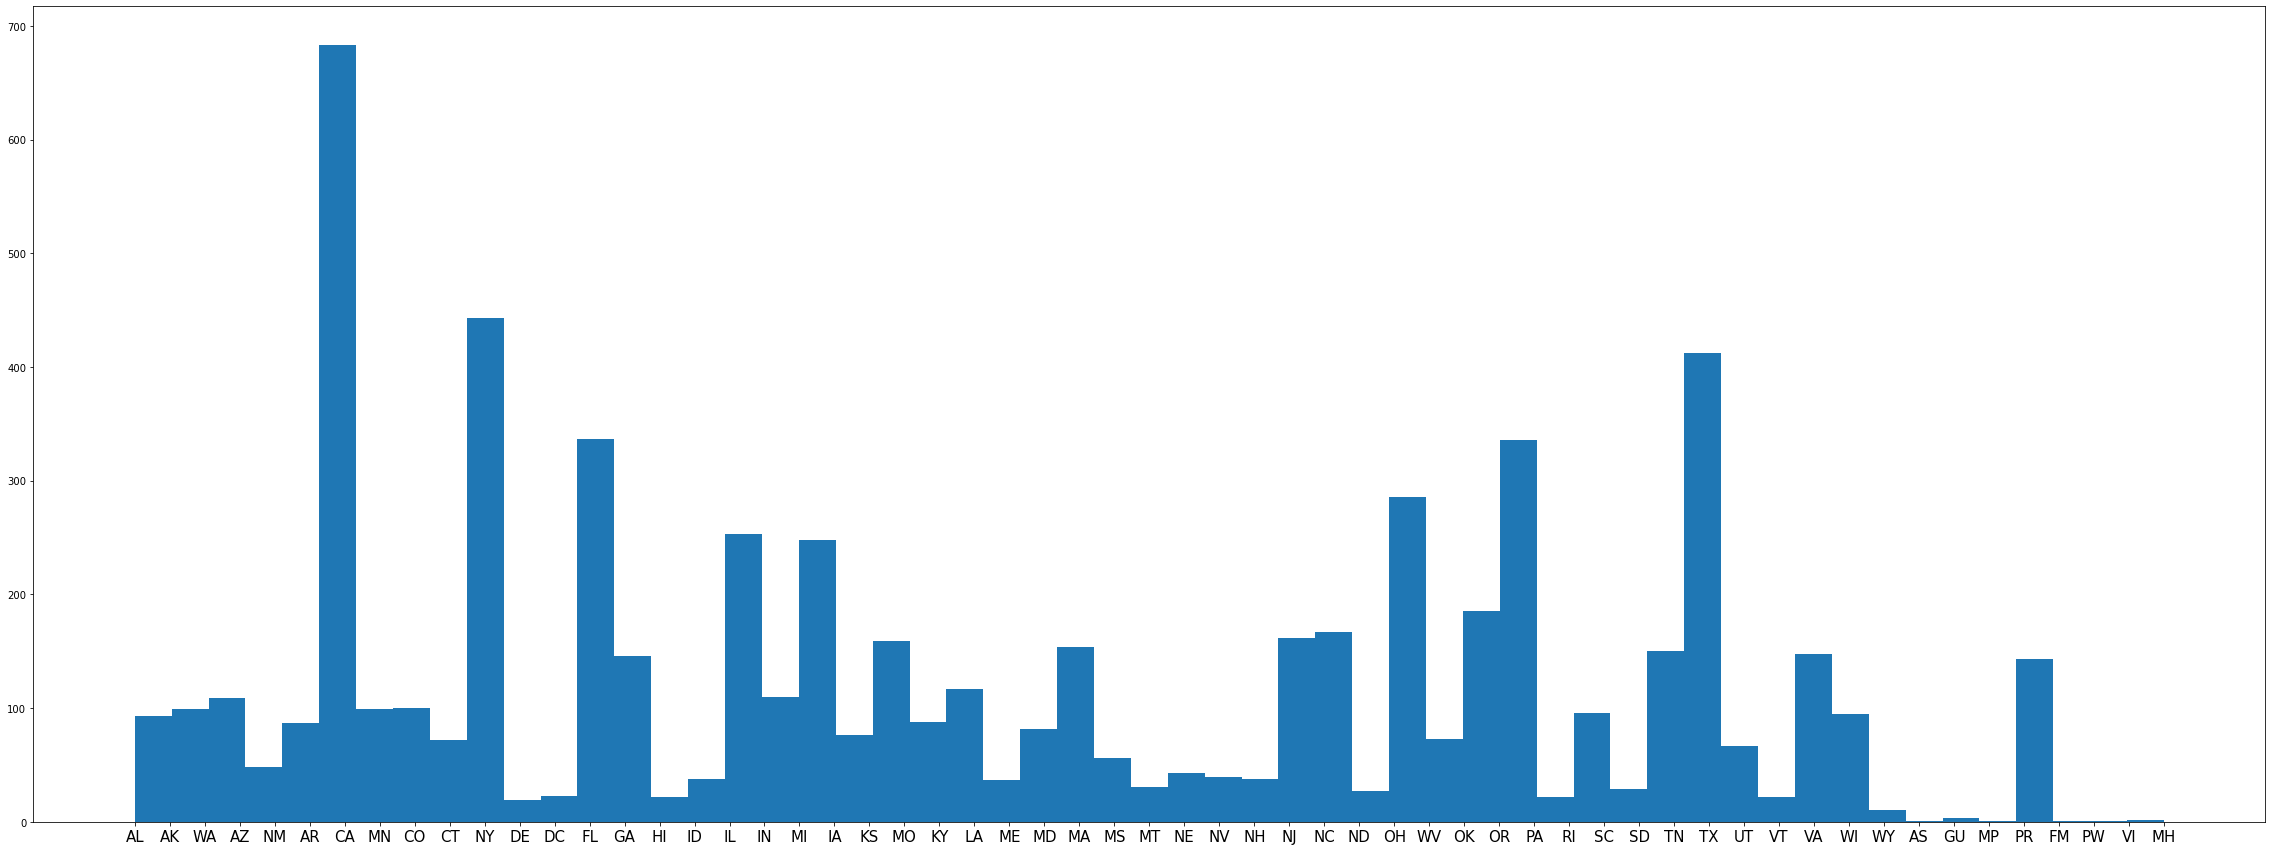

In [30]:
df_organisations_filtered['STABBR'].hist(bins=55, grid=False, figsize=(40, 15), xlabelsize=15);

In [31]:
df_organisations_filtered.head()

,UNITID,INSTNM,IALIAS,CITY,STABBR,FIPS,OBEREG,GENTELE,EIN,DUNS,...,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD
0,100654,Alabama A & M University,AAMU,Normal,AL,1,5,2563725000,636001109,197216455,...,2,-2,-2,26620,1,290,-2,1089,Madison County,105
1,100663,University of Alabama at Birmingham,,Birmingham,AL,1,5,2059344011,636005396,063690705,...,1,The University of Alabama System,101050,13820,1,142,-2,1073,Jefferson County,107
2,100690,Amridge University,Southern Christian University Regions University,Montgomery,AL,1,5,33438738777550,237034324,126307792,...,2,-2,-2,33860,1,388,-2,1101,Montgomery County,102
3,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,Huntsville,AL,1,5,2568246120,630520830,949687123,...,1,The University of Alabama System,101050,26620,1,290,-2,1089,Madison County,105
4,100724,Alabama State University,,Montgomery,AL,1,5,3342294100,636001101,040672685,...,2,-2,-2,33860,1,388,-2,1101,Montgomery County,107


In [32]:
df_customer_data_raw.head()

,UNITID,CONVERTED,DID_TRIAL,AMOUNT_OF_LICENSES,TERM_OF_LICENSE,HAS_TECH_DEPT,AMOUNT_OF_INTERACTIONS_W_SALES,AMOUNT_OF_CALLS,AMOUNT_OF_MESSAGES,PRODUCT_A,PRODUCT_B,CLIENT_RENEWAL,ENGAGED_WITH_MESSAGING,REACHED_NOT_ENGAGED_WITH_MESSAGING
0,100654,1,1,429,5,0,54,18,36,0,1,1,1,1
1,100663,1,0,50,7,0,329,292,37,0,1,1,0,1
2,100690,1,0,257,6,0,437,66,371,1,1,0,1,1
3,100706,1,0,175,6,1,191,117,74,1,1,1,1,1
4,100724,0,0,680,6,1,162,11,151,0,0,0,0,0


In [33]:
cust_raw_columns = df_customer_data_raw.shape[1]
cust_raw_rows = df_customer_data_raw.shape[0]
cust_is_nulls_counts = len(df_customer_data_raw.columns[df_customer_data_raw.isnull().sum()==0])
cust_categorical_vals = df_customer_data_raw.select_dtypes(include=['object'])
cust_categorical_vals_columns = list(cust_categorical_vals.columns)

print(f'The raw customer data has {cust_raw_columns} columns and {cust_raw_rows} rows')
print(f'The customer df has {cust_is_nulls_counts} columns without null values')
print(f'There are {cust_categorical_vals.shape[1]} categorical values in the customer data set.')


The raw customer data has 14 columns and 6559 rows
The customer df has 14 columns without null values
There are 0 categorical values in the customer data set.


## Combining the data sets with each other. 

Using the `UNITID` column we will joing the data sets before looking for correlation in the features

In [34]:
df_combined_data = df_organisations_filtered.merge(df_customer_data_raw, on='UNITID', how='left')
df_combined_data.head()

,UNITID,INSTNM,IALIAS,CITY,STABBR,FIPS,OBEREG,GENTELE,EIN,DUNS,...,TERM_OF_LICENSE,HAS_TECH_DEPT,AMOUNT_OF_INTERACTIONS_W_SALES,AMOUNT_OF_CALLS,AMOUNT_OF_MESSAGES,PRODUCT_A,PRODUCT_B,CLIENT_RENEWAL,ENGAGED_WITH_MESSAGING,REACHED_NOT_ENGAGED_WITH_MESSAGING
0,100654,Alabama A & M University,AAMU,Normal,AL,1,5,2563725000,636001109,197216455,...,5,0,54,18,36,0,1,1,1,1
1,100663,University of Alabama at Birmingham,,Birmingham,AL,1,5,2059344011,636005396,063690705,...,7,0,329,292,37,0,1,1,0,1
2,100690,Amridge University,Southern Christian University Regions University,Montgomery,AL,1,5,33438738777550,237034324,126307792,...,6,0,437,66,371,1,1,0,1,1
3,100706,University of Alabama in Huntsville,UAH University of Alabama Huntsville,Huntsville,AL,1,5,2568246120,630520830,949687123,...,6,1,191,117,74,1,1,1,1,1
4,100724,Alabama State University,,Montgomery,AL,1,5,3342294100,636001101,040672685,...,6,1,162,11,151,0,0,0,0,0


#### Replace -2 values in the data set
The IPEDS database uses `-2` to indicate `0` values, this might cause issues when applying the segmentation logic. 

At this point I will replace all `-2` values with `0`. The data set uses `-2` in the context of `integer` and `string` values

In [36]:
df_remove_ambiguous_values = df_combined_data.replace([-2, '-2'], 0)
df_remove_ambiguous_values.head()
df_remove_ambiguous_values.to_csv('../data/data_out.csv', index=False)